In [1]:
from run_kinfit import run_kinfit, build_custom_hypo
from draw_funcs import draw_1d_hist, draw_1d_hists
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
input_path = '/var/kinfit/data/tr_ph_run039784.root'
output_path = 'kinfit_pi0gamma_run039784.root'

In [3]:
build_custom_hypo('Hypo3PhotonsCustom.cpp')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/minor_revision/pi0gamma/pi0gamma/Hypo3PhotonsCustom_cpp.so


In [4]:
run_kinfit(input_path, output_path=output_path)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run039784.root Title: 
(TrPh &) @0x7f2252a22000


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/minor_revision/pi0gamma/pi0gamma/TrPh_C.so


In [5]:
fl = TFile.Open(output_path, 'read')

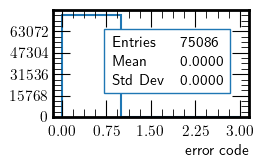

In [6]:
fl.kf_data.Draw("kf_err>>kf_err(3,0,3)", "kf_err==0", "goff")
draw_1d_hist("kf_err", xlabel='error code',
            fraction=0.47,
            info_coords=(0.3, 0.3))
plt.savefig('kf_err_3gamma.eps')

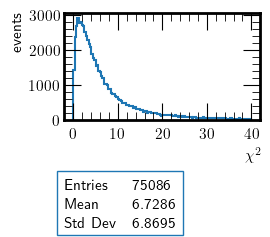

In [21]:
fl.kf_data.Draw("kf_chi2>>kf_chi2(128,0,40)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2", xlabel=r'$\chi^2$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
            h_y=1000, h_x=10)
plt.savefig('kf_chi2_3gamma.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


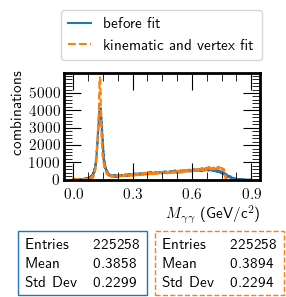

In [20]:
fl.kf_data.Draw("in_mgg>>in_mgg(512,0,0.9)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mgg>>kf_mgg(512,0,0.9)", "kf_err==0", "goff")
draw_1d_hists([('in_mgg', 'before fit'), ('kf_mgg', 'kinematic and vertex fit')], 
              xlabel=r'$M_{\gamma\gamma}$ (GeV/c$^2$)',
              ylabel='combinations',
              fraction=0.47,
             info_coords=(-0.2, -1.0),
            dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
             h_y=1000, h_x =0.3)
plt.savefig('kf_mgg_3gamma.eps',  bbox_inches='tight')

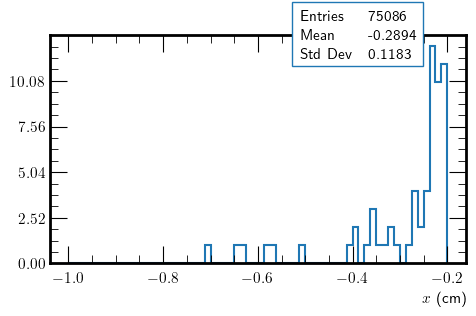

In [9]:
fl.kf_data.Draw("kf_vtx[0]>>kf_vtx_x(64, -1, -0.2)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_x", xlabel=r'$x$ (cm)')
plt.savefig('kf_vtx_x_pi0gamma.eps')

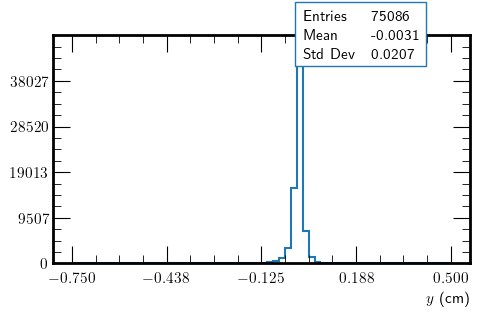

In [10]:
fl.kf_data.Draw("kf_vtx[1]>>kf_vtx_y(64, -0.75, 0.5)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_y", xlabel=r'$y$ (cm)')
plt.savefig('kf_vtx_y_pi0gamma.eps')

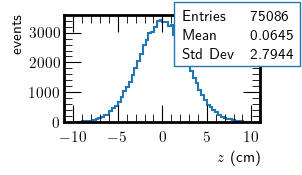

In [11]:
fl.kf_data.Draw("kf_vtx[2]>>kf_vtx_z(64, -10, 10)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_z", 
             xlabel=r'$z$ (cm)',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.6, 0.6),
            h_y=1000, h_x=5)
plt.savefig('kf_vtx_z_3gamma.eps', bbox_inches='tight')

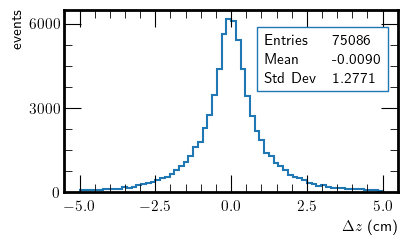

In [12]:
fl.kf_data.Draw("kf_vtx[2]-sim_ee_vtx[2]>>kf_vtx_dz(64, -5, 5)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dz", 
             xlabel=r'$\Delta z$ (cm)',
            ylabel='events',
             fraction=0.8,
            info_coords=(0.6, 0.6),
            h_y=3000, h_x=2.5)
plt.savefig('kf_vtx_dz_3gamma.eps')

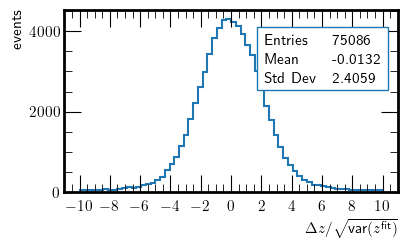

In [13]:
fl.kf_data.Draw("(kf_vtx[2]-sim_ee_vtx[2]) / sigma_vtx0_z>>kf_vtx_dz_pull(64, -10, 10)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dz_pull", 
             xlabel=r'$\Delta z / \sqrt{\text{var}(z^{\text{fit}})}$',
            ylabel='events',
             fraction=0.8,
            info_coords=(0.6, 0.6),
            h_y=2000, h_x=2)
plt.savefig('pi0gamma_vtx_dz_pull.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


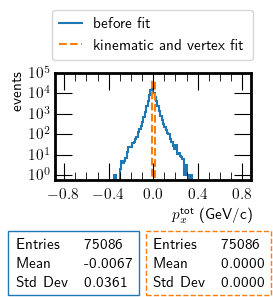

In [14]:
fl.kf_data.Draw("in_total_p[0]>>in_total_px(128,-0.8,0.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_total_p[0]>>kf_total_px(128,-0.8,0.8)", "kf_err==0", "goff")
draw_1d_hists([('in_total_px', 'before fit'), ('kf_total_px', 'kinematic and vertex fit')], 
              xlabel=r'$p^{\text{tot}}_x$ (GeV/c)', 
              ylabel='events',
              yscale='log',
             fraction=0.47,
             info_coords=(-0.2, -1.0),
              legend_loc='center right',
              bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
            dh=0.0,
            dw=0.7,
             y_ticks=[1., 1.e+1, 1.e+2, 1.e+3, 1.e+4, 1.e+5], 
              h_x=0.4)
plt.savefig('kf_px_tot_3gamma.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


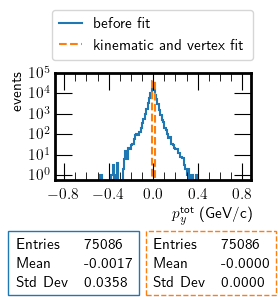

In [15]:
fl.kf_data.Draw("in_total_p[1]>>in_total_py(128,-0.8,0.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_total_p[1]>>kf_total_py(128,-0.8,0.8)", "kf_err==0", "goff")
draw_1d_hists([('in_total_py', 'before fit'), ('kf_total_py', 'kinematic and vertex fit')], 
              xlabel=r'$p^{\text{tot}}_y$ (GeV/c)',
              ylabel='events',
              yscale='log',
             fraction=0.47,
             info_coords=(-0.2, -1.0),
              legend_loc='center right',
              bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
            dh=0.0,
            dw=0.7,
              y_ticks=[1., 10., 1.e+2, 1.e+3, 1.e+4, 1.e+5], 
              h_x=0.4)
plt.savefig('kf_py_tot_3gamma.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


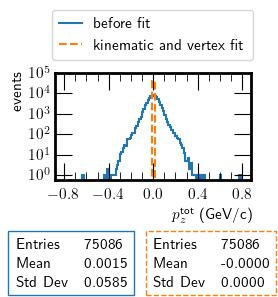

In [16]:
fl.kf_data.Draw("in_total_p[2]>>in_total_pz(128,-0.8, 0.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_total_p[2]>>kf_total_pz(128,-0.8, 0.8)", "kf_err==0", "goff")
draw_1d_hists([('in_total_pz', 'before fit'), ('kf_total_pz', 'kinematic and vertex fit')], 
              xlabel=r'$p^{\text{tot}}_z$ (GeV/c)', 
              ylabel='events',
              yscale='log',
             fraction=0.47,
             info_coords=(-0.2, -1.0),
               legend_loc='center right',
              bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
            dh=0.0,
            dw=0.7,
             y_ticks=[1., 10., 1.e+2, 1.e+3, 1.e+4, 1.e+5], 
              h_x=0.4)
plt.savefig('kf_pz_tot_3gamma.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


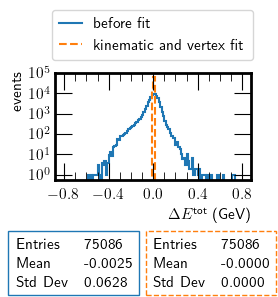

In [17]:
fl.kf_data.Draw("in_total_p[3]>>in_total_pe(128, -0.8, 0.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_total_p[3]>>kf_total_pe(128, -0.8, 0.8)", "kf_err==0", "goff")
draw_1d_hists([('in_total_pe', 'before fit'), ('kf_total_pe', 'kinematic and vertex fit')], 
              xlabel=r'$\Delta E^{\text{tot}}$ (GeV)', 
              ylabel='events',
              yscale='log',
             fraction=0.47,
             info_coords=(-0.2, -1.0),
              legend_loc='center right',
              bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
            dh=0.0,
            dw=0.7,
             y_ticks=[1., 10., 1.e+2, 1.e+3, 1.e+4, 1.e+5], 
              h_x=0.4)
plt.savefig('kf_e_tot_3gamma.eps', bbox_inches='tight')

In [18]:
# fl.Close()